## 3. Sentiment Analysis

### Analyze sentiment values, (positivity, negativty) and (facts, opinions)

In [1]:
# Til sentiment analysis skal vi bruge det oprindelige ikke-cleanede corpus
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name,speech_time
bushjunior,"Madam Speaker, Vice President Cheney, members ...",George W. Bush,53
bushsenior,"Mr. Speaker and Mr. President, distinguished m...",George H.W. Bush,52
carter,"Mr. President, Mr. Speaker, members of the 96t...",Jimmy Carter,33
clinton,"Mr. Speaker, Mr. Vice President, members of Co...",Bill Clinton,90
johnson,"Mr. Speaker, Mr. President, Members of the C...",Lyndon B. Johnson,44
kennedy,"Mr. Vice President, Mr. Speaker, Members of th...",John F. Kennedy,45
nixon,"Mr. Speaker, Mr. President, my colleagues in t...",Richard Nixon,44
obama,"Mr. Speaker, Mr. Vice President, Members of Co...",Barack Obama,61
reagan,"Mr. Speaker, Mr. President, and distinguished ...",Ronald Reagan,44
trump,"Madam Speaker, Mr. Vice President, Members of ...",Donald Trump,52


In [2]:
# Finder polarity og subjectivity for hver tale
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

# polarity går fra -1 til 1
# subjectivity går fra 0 til 1

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,speech_time,polarity,subjectivity
bushjunior,"Madam Speaker, Vice President Cheney, members ...",George W. Bush,53,0.130243,0.436398
bushsenior,"Mr. Speaker and Mr. President, distinguished m...",George H.W. Bush,52,0.110642,0.446560
carter,"Mr. President, Mr. Speaker, members of the 96t...",Jimmy Carter,33,0.138561,0.454664
clinton,"Mr. Speaker, Mr. Vice President, members of Co...",Bill Clinton,90,0.158606,0.420449
johnson,"Mr. Speaker, Mr. President, Members of the C...",Lyndon B. Johnson,44,0.150955,0.429014
kennedy,"Mr. Vice President, Mr. Speaker, Members of th...",John F. Kennedy,45,0.124134,0.471664
nixon,"Mr. Speaker, Mr. President, my colleagues in t...",Richard Nixon,44,0.184140,0.471715
obama,"Mr. Speaker, Mr. Vice President, Members of Co...",Barack Obama,61,0.118476,0.431306
reagan,"Mr. Speaker, Mr. President, and distinguished ...",Ronald Reagan,44,0.158565,0.429967
trump,"Madam Speaker, Mr. Vice President, Members of ...",Donald Trump,52,0.112809,0.443888


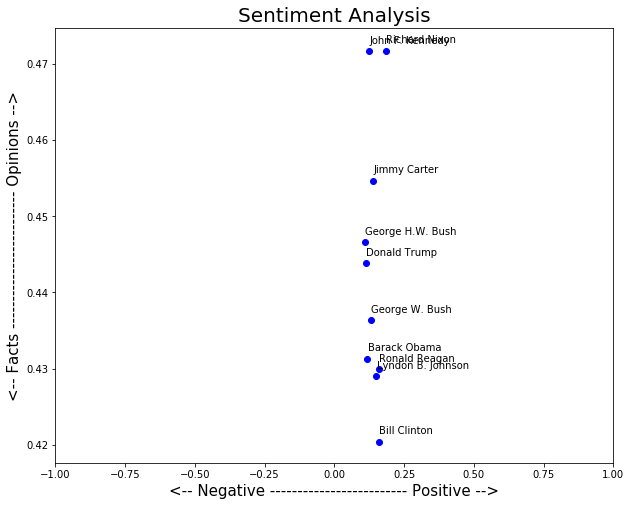

In [7]:
import matplotlib.pyplot as plt

# Plotter resultater
plt.rcParams['figure.figsize'] = [10, 8]

for index, president in enumerate(data.index):
    x = data.polarity.loc[president]
    y = data.subjectivity.loc[president]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-1, 1) 
#     plt.ylim(0, 1)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ------------------------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts ------------------------- Opinions -->', fontsize=15)

plt.show()

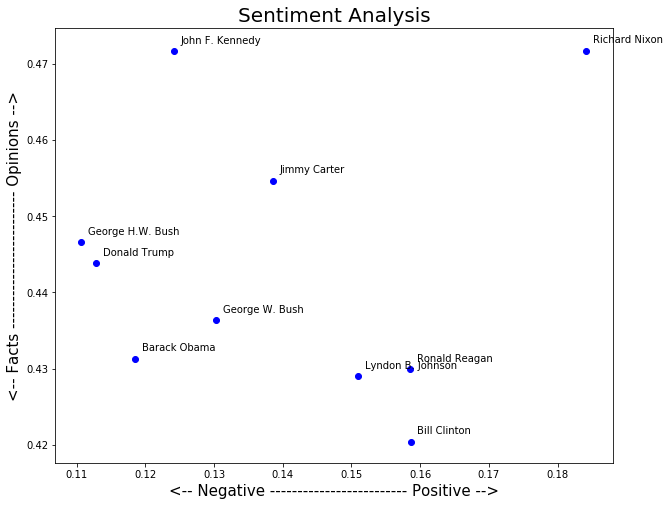

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, president in enumerate(data.index):
    x = data.polarity.loc[president]
    y = data.subjectivity.loc[president]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
#     plt.xlim(.10, .20) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ------------------------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts ------------------------- Opinions -->', fontsize=15)

plt.show()